In [58]:
import requests
import time
import pandas as pd

## Get Price

2022-02-11 12:43:59
2022-02-11 12:44:01
2022-02-11 12:44:04
2022-02-11 12:44:06
2022-02-11 12:44:08
2022-02-11 12:44:10


KeyboardInterrupt: 

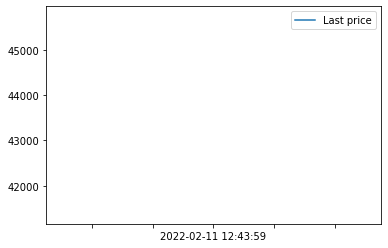

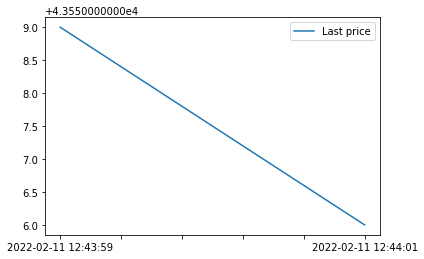

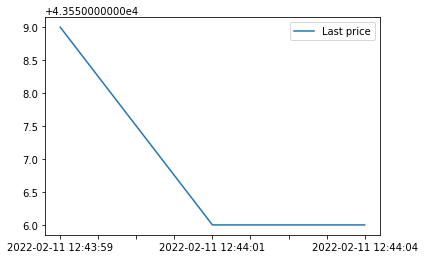

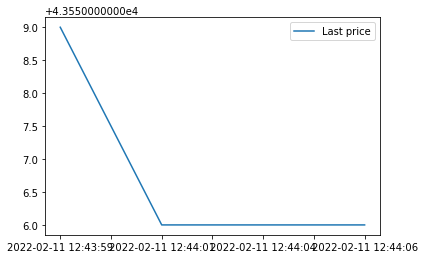

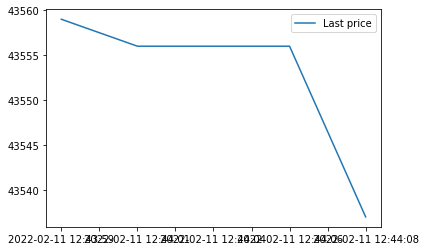

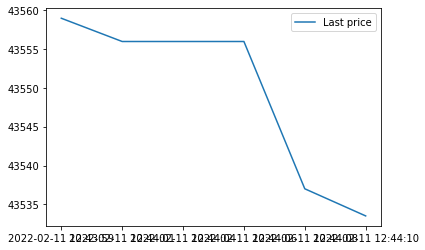

In [64]:
prices = pd.DataFrame(index=[timestamp])
while True:
    response = pd.DataFrame(requests.get(url='https://test.deribit.com/api/v2/public/ticker?instrument_name=BTC-PERPETUAL').json())[['result']]
    timestamp = str(pd.to_datetime(str(response.loc['timestamp'][0]), unit='ms'))[:-7]
    print(timestamp)
    prices.loc[timestamp,'Last price'] = response.loc['last_price'][0]
    time.sleep(2)

## Authentication

In [72]:
client_id = '7UJ5lQgV'
client_secret = 'v1TevPjks6F8g74--djDkA9WNW8DOtoQ2QSDfGgvcgY'
url = 'http://test.deribit.com/api/v2/'

response = requests.get(url=f'{url}public/auth?client_id={client_id}&client_secret={client_secret}&grant_type=client_credentials')
response

<Response [200]>

## Get account balance

In [70]:
response = requests.get(url=f'{url}private/get_account_summary?currency=BTC', auth=requests.auth.HTTPBasicAuth(client_id, client_secret))
pd.DataFrame(response.json())[['result']]

,result
available_funds,0.937036
available_withdrawal_funds,0.936019
balance,0.94061
currency,BTC
delta_total,0.2294
delta_total_map,{'btc_usd': 0.229434838}
deposit_address,bcrt1qudth5qzsdqxcmt59ud4l5enw4hpx4q20dunv9m
equity,0.941628
estimated_liquidation_ratio,0.197401
estimated_liquidation_ratio_map,{'btc_usd': 0.19740104659434396}


## Get positions

In [117]:
response = requests.get(url=f'{url}private/get_positions?currency=BTC', auth=requests.auth.HTTPBasicAuth(client_id, client_secret))
positions = pd.DataFrame(response.json()['result']).T
print(f'Total PnL in USD: ${round(positions.loc["total_profit_loss",0]*positions.loc["mark_price",0],2)}')
positions

Total PnL in USD: $14511.34


,0
total_profit_loss,0.329471
size_currency,3.519178
size,155000.0
settlement_price,43392.81
realized_profit_loss,-0.022786
realized_funding,0.000178
open_orders_margin,0.0
mark_price,44044.38
maintenance_margin,0.027013
leverage,50


## Open position

In [119]:
def buy(instrument, amount, otype):
    response = requests.get(url=f'{url}private/buy?amount={amount}&instrument_name={instrument}&type={otype}', auth=requests.auth.HTTPBasicAuth(client_id, client_secret))
    if response.status_code == 200:
        print(f'Order succesfully executed, avg price was {response.json()["result"]["trades"][0]["price"]}')
    return response

def sell(instrument, amount, otype):
    response = requests.get(url=f'{url}private/sell?amount={amount}&instrument_name={instrument}&type={otype}', auth=requests.auth.HTTPBasicAuth(client_id, client_secret))
    if response.status_code == 200:
        print(f'Order succesfully executed, avg price was {response.json()["result"]["trades"][0]["price"]}')
    return response

sell('BTC-PERPETUAL', '50000', 'market')

Order succesfully executed, avg price was 46875.5


<Response [200]>

43337.5